In [2]:
import pandas as pd
import pkg_nlp_analysis as nlp

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

import nltk
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords

%load_ext autoreload
%autoreload 2

In [4]:
C1_org_name = pd.read_csv('data_output/C1_org_name.csv')
C2_org_name = pd.read_csv('data_output/C2_org_name.csv')

In [29]:
def densityplot_time_per_ep (org_name, matt_nomatt, C1_C2):
    person_episode_group = org_name
    person_episode_group = org_name.loc[org_name['total_time'] <= 100]
    #np.percentile(C2_org_name['total_time'], 99.5)
    names = ['matt', 'laura',  
            'sam', 'marisha', 'travis', 
            'liam', 'taliesin', 'ashley']

    palette ={'laura':'C0', 
        'matt':'C7', 
        'marisha':'C2', 
        'sam':'C3', 
        'taliesin':'C4', 
        'liam':'C5', 
        'travis':'C1', 
        'ashley':'C6', 
        'orion':'C8', 
        'guest':'C9',
        'unassigned':'k'}

    if matt_nomatt == 'nomatt':
        person_episode_group = person_episode_group.loc[person_episode_group['person'] != 'matt']
        names = ['laura',  
        'sam', 'marisha', 'travis', 
        'liam', 'taliesin', 'ashley']

    plt.figure(figsize=(7,5))
    for name in names:
        color = palette[name]
        ax = sns.kdeplot(person_episode_group["total_time"][(person_episode_group["person"] == name)], shade=True, color=color)
    ax.legend(names)
    ax.set_xlim(left=0, right = 10)
    #ax.set_ylim(top=0.005)
    ax.set_xlabel("Seconds per Episode")

    ax.title.set_text('%s: Time Spoken Distribution' % C1_C2)

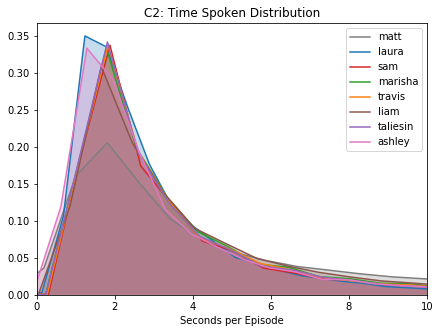

In [30]:
densityplot_time_per_ep(C2_org_name, 'matt', 'C2')

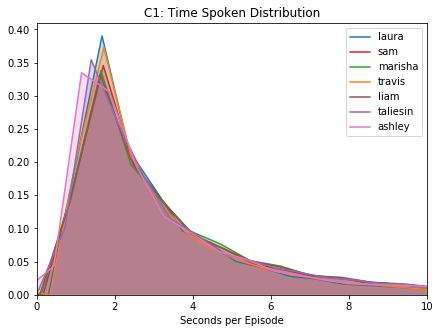

In [31]:
densityplot_time_per_ep(C1_org_name, 'nomatt', 'C1')

In [105]:
test_df = C1_org_name.groupby(['episode','person'])['speech'].apply(lambda x: '. '.join(x))
test_df = test_df.reset_index()

In [35]:
document = list(test_df['speech'])

In [107]:
#create a list of stop words
stop_words = set(stopwords.words("english"))
for x in ('right', 'okay', 'like', 'well','thats','going', 'yeah'):
    stop_words.add(x)
#show how many words are in the list of stop words
print(len(stop_words))
print(stop_words)

186
{'thats', 'had', 'before', 'needn', 'so', 'is', 'under', 'we', 'up', 'once', 'most', 'only', 'was', 'being', 'both', 'for', "you've", 'okay', 'nor', 'all', 'you', 'through', 'other', 'but', 'below', 'there', 'doesn', "mightn't", "won't", 'if', 'doing', 'who', 'further', 'they', 'few', "mustn't", 'himself', 'their', 'while', "isn't", 'some', 're', 'a', 'y', 've', 'couldn', 'at', 'did', 'itself', "she's", 'off', "shan't", 'shouldn', 'the', "weren't", 'shan', 'yourselves', 'of', "hadn't", 'having', 'going', 'he', 'should', 'be', 'any', 'than', 'in', "hasn't", 'wasn', 'does', 'well', 'yours', 'haven', 'just', 'then', 'wouldn', 'such', 'i', 'ours', 'its', "that'll", 'not', 'mustn', 'my', 'like', 'same', 'now', 'were', 'weren', "wouldn't", 'over', 'each', 'between', 'against', 'why', 'hers', 'more', 'own', 'into', 'been', 'have', 'which', "you'll", 'ain', 'mightn', 'these', 'too', "doesn't", 'she', "haven't", 'ourselves', 'what', 'how', 'can', 'themselves', 'them', 'yeah', 'with', 'where

In [110]:

#179
#construct a new list to store the cleaned text
clean_desc = []
count = 0
for w in range(len(C1_org_name.speech)):
    try:
        desc = C1_org_name['speech'][w].lower()
    except:
        pass
    
    #remove punctuation
    desc = re.sub('[^a-zA-Z]', ' ', desc)
    
    #remove tags
    desc = re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",desc)
    
    #remove special characters and digits
    desc = re.sub("(\\d|\\W)+"," ",desc)
    
    split_text = desc.split()
    
    #Lemmatisation
    lem = WordNetLemmatizer()
    split_text = [lem.lemmatize(word) for word in split_text if not word in stop_words and len(word) >2] 
    split_text = " ".join(split_text)
    clean_desc.append(split_text)
    count += 1
    if count%10000 == 0:
        print ('step: ', count)

step:  10000
step:  20000
step:  30000
step:  40000
step:  50000
step:  60000
step:  70000
step:  80000
step:  90000
step:  100000
step:  110000
step:  120000
step:  130000
step:  140000
step:  150000
step:  160000
step:  170000
step:  180000
step:  190000
step:  200000
step:  210000
step:  220000
step:  230000
step:  240000
step:  250000
step:  260000
step:  270000
step:  280000


In [111]:
#TF-IDF vectorizer
tfv = TfidfVectorizer(stop_words = stop_words, ngram_range = (1,1))
#transform
vec_text = tfv.fit_transform(clean_desc)
#returns a list of words.
words = tfv.get_feature_names()

In [112]:
#setup kmeans clustering
kmeans = KMeans(n_clusters = 21, n_init = 17, n_jobs = -1, tol = 0.01, max_iter = 200)
#fit the data 
kmeans.fit(vec_text)
#this loop transforms the numbers back into words
common_words = kmeans.cluster_centers_.argsort()[:,-1:-11:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

KeyboardInterrupt: 

In [ ]:
SSE = []
count = 0
cluster_range = list(x*4 for x in range(1,10))
for cluster in cluster_range:
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(vec_text)
    SSE.append(kmeans.inertia_)
    count += 1
    print ('completed: ', count)

In [ ]:
# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':cluster_range, 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')